<a href="https://colab.research.google.com/github/ajgquional/LiL_Synthetic-Data-AI-Privacy/blob/main/Using_SD_for_privacy_preserving_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# upload synthetic dataset
data_path = '.'
print("adapt `syn_file_path` to point to your generated synthetic data file")
syn_file_path = f'{data_path}/paris-synthetic.csv'
syn = pd.read_csv(syn_file_path)
print(f"read synthetic data with {syn.shape[0]:,} records and {syn.shape[1]:,} attributes")

# fetch training and holdout data
train = pd.read_csv(f'{data_path}/paris-training.csv')
print(f'read training data with {train.shape[0]:,} records and {train.shape[1]} attributes')
holdout = pd.read_csv(f'{data_path}/paris-holdout.csv')
print(f'read holdout data with {holdout.shape[0]:,} records and {holdout.shape[1]} attributes')


adapt `syn_file_path` to point to your generated synthetic data file
read synthetic data with 45,380 records and 17 attributes
read training data with 45,380 records and 17 attributes
read holdout data with 11,346 records and 17 attributes


## Explore Synthetic Data

Show 10 randomly sampled synthetic records. Note, that you can execute the following cell multiple times, to see different samples.

## Synthesize Data via MOSTLY AI Synthetic Data Platform

For this tutorial, we will be using a dataset of AirBnB listings for Paris, that has been obtained from http://insideairbnb.com/get-the-data/. The dataset consists of 56,726 records, 16 mixed-type features and has 1 binary target variable, that indicates whether a listing has a price of above $100 or not. In order to properly evaluate the quality of synthetic data, we randomly split the dataset into 80% training and 20% holdout records.

1. Download `paris-training.csv` and `paris-holdout.csv`. (The data pre-processing script can be found at the bottom of this tutorial.)

2. Synthesize `paris-training.csv` via [MOSTLY AI](https://mostly.ai/). You can leave all settings at their default, and just proceed to launch job.

<img src='https://raw.githubusercontent.com/mostly-ai/mostly-tutorials/fb83c88ae470e314b80ef21d16cdeb9300267fc4/train-synthetic-test-real/screen1.png' width="400px"/> <img src='https://raw.githubusercontent.com/mostly-ai/mostly-tutorials/fb83c88ae470e314b80ef21d16cdeb9300267fc4/train-synthetic-test-real/screen2.png' width="400px"/><br /><img src='https://raw.githubusercontent.com/mostly-ai/mostly-tutorials/fb83c88ae470e314b80ef21d16cdeb9300267fc4/train-synthetic-test-real/screen3.png' width="400px"/> <img src='https://raw.githubusercontent.com/mostly-ai/mostly-tutorials/fb83c88ae470e314b80ef21d16cdeb9300267fc4/train-synthetic-test-real/screen4.png' width="400px"/>

3. Once the job has finished, download the generated synthetic data as CSV file to your computer, rename it to `paris-synthetic.csv` and upload to this Notebook again.


In [2]:
syn.sample(n=10)

,price,host_since,host_response_time,host_is_superhost,neighbourhood,property_type,room_type,accommodates,bedrooms,beds,minimum_nights,number_of_reviews,scores_rating,scores_cleanliness,scores_checkin,scores_communication,scores_location
29537,above $100,2019.0,within an hour,t,Opéra,Room in boutique hotel,Private room,2,1.0,1.0,1,105,4.77,4.85,4.93,4.90,4.88
6723,above $100,2014.0,NaN,f,Buttes-Chaumont,Entire rental unit,Entire home/apt,3,1.0,2.0,6,104,4.69,4.73,4.88,4.86,4.64
13889,below $100,2014.0,NaN,f,Reuilly,Entire rental unit,Entire home/apt,2,NaN,1.0,365,0,NaN,NaN,NaN,NaN,NaN
18692,above $100,2015.0,NaN,f,Palais-Bourbon,Entire rental unit,Entire home/apt,5,2.0,2.0,3,0,NaN,NaN,NaN,NaN,NaN
5231,above $100,2019.0,within an hour,f,Passy,Entire place,Entire home/apt,2,NaN,1.0,90,0,NaN,NaN,NaN,NaN,NaN
13208,below $100,2021.0,NaN,f,Buttes-Montmartre,Private room in rental unit,Private room,2,1.0,1.0,1,200,4.44,4.43,4.50,4.57,4.75
44968,above $100,2016.0,within a few hours,f,Louvre,Entire rental unit,Entire home/apt,2,1.0,1.0,4,15,4.70,4.20,4.70,4.93,4.70
13157,above $100,2021.0,NaN,f,Buttes-Montmartre,Entire rental unit,Entire home/apt,3,1.0,2.0,1,2,3.50,3.50,3.00,3.50,5.00
13804,below $100,2016.0,NaN,f,Opéra,Entire rental unit,Entire home/apt,2,1.0,1.0,2,22,4.83,4.78,4.86,4.86,4.82
31976,below $100,2015.0,NaN,f,Luxembourg,Entire rental unit,Entire home/apt,2,NaN,1.0,365,4,4.75,5.00,5.00,5.00,5.00


Show 5 randomly sampled listings with more than 10 ratings, but with an average rating below 4

In [3]:
syn.loc[(syn["scores_rating"]<4) & (syn["number_of_reviews"]>10)].sample(n=5)

,price,host_since,host_response_time,host_is_superhost,neighbourhood,property_type,room_type,accommodates,bedrooms,beds,minimum_nights,number_of_reviews,scores_rating,scores_cleanliness,scores_checkin,scores_communication,scores_location
11155,above $100,2022.0,NaN,f,Opéra,Entire rental unit,Entire home/apt,4,1.0,2.0,1,32,3.74,3.64,4.19,4.30,4.66
20782,below $100,2014.0,NaN,f,Opéra,Entire rental unit,Entire home/apt,3,NaN,2.0,3,17,3.80,3.56,5.00,4.00,4.38
41896,above $100,2017.0,NaN,f,Temple,Entire condo,Entire home/apt,2,NaN,1.0,1,19,3.68,3.48,4.65,4.32,4.75
18169,above $100,2022.0,within an hour,f,Élysée,Entire rental unit,Entire home/apt,6,3.0,4.0,1,14,3.81,3.25,3.71,3.64,4.14
9776,above $100,2022.0,within an hour,f,Vaugirard,Entire rental unit,Entire home/apt,6,2.0,3.0,1,23,3.91,4.17,3.43,4.05,4.60


Rank neighbourhoods by their average score for the location.

In [4]:
syn.groupby('neighbourhood')['scores_location'].mean().sort_values(ascending=False).round(3).to_frame().reset_index()

,neighbourhood,scores_location
0,Hôtel-de-Ville,4.937
1,Louvre,4.918
2,Luxembourg,4.908
3,Panthéon,4.902
4,Palais-Bourbon,4.899
5,Temple,4.893
6,Élysée,4.866
7,Bourse,4.856
8,Opéra,4.835
9,Passy,4.831


## Validate synthetic data via Train-Synthetic-Test-Real

In this section we demonstrate the process of evaluating the quality of synthetic data based on its utility for a downstream Machine Learning (ML) task. The method is commonly referred to as the Train-Synthetic-Test-Real (TSTR) evaluation [[1](#refs)]. The TSTR evaluation serves as a robust measure of synthetic data quality because ML models rely on the accurate representation of deeper underlying patterns to perform effectively on previously unseen data. As a result, this approach offers a more reliable assessment than simply evaluating higher-level statistics.

See image below for the general setup of TSTR.

<img src='https://raw.githubusercontent.com/mostly-ai/mostly-tutorials/fb83c88ae470e314b80ef21d16cdeb9300267fc4/train-synthetic-test-real/TSTR.png' width="600px"/>

Thus, we take actual (=real) data, and split it into a holdout and a training dataset. Next, we create a synthetic dataset only based on the training data. Then we train a Machine Learning (ML) model, and do so once using the synthetic data and once using the actual training data. And finally we evaluate the performance of each of those two models on top of the actual holdout data, that was kept aside all along. By comparing the performance of these two models, we can assess how much utility has been retained by the synthesization method with respect to a specific ML task.

Note, that one needs to use a true holdout for the evaluation to properly measure out-of-sample performance, as this is the relevant metric for real-world use cases. If one uses the same training data that has been used for the synthesis, one would "leak" information from training into evaluation. This becomes particularly an issue for synthesizers that are prone to overfitting, and simply memorize the samples that it has been exposed to. If one, on the other hand, were to use synthetic data for the evaluation, one would not get meaningful results either, as the synthetic data might not be representative of the real data. E.g., consider the degenerate case of a synthesizer that only produces the same record over and over again. Any model trained on that data, would yield perfect results when evaluated on it again, whereas it will be of no use when applied to real data.

In [5]:
import lightgbm as lgb
from lightgbm import early_stopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 72

target_col = 'price'
target_val = 'above $100'

def prepare_xy(df):
    y = (df[target_col]==target_val).astype(int)
    X = df[[c for c in df if c != target_col]]
    # convert string columns to Categoricals
    for col in X.select_dtypes(['object', 'string']):
        X[col] = pd.Categorical(X[col])
    return X, y

def train_model(X, y):
    cat_cols = list(X.select_dtypes('category').columns)
    X_trn, X_val, y_trn, y_val = train_test_split(X, y, test_size=0.2, random_state=1)
    ds_trn = lgb.Dataset(X_trn, label=y_trn, categorical_feature=cat_cols, free_raw_data=False)
    ds_val = lgb.Dataset(X_val, label=y_val, categorical_feature=cat_cols, free_raw_data=False)
    model = lgb.train(
        params={
            'metric': 'auc',
            'objective': 'binary'
        },
        train_set=ds_trn,
        valid_sets=[ds_val],
        callbacks=[early_stopping(5)],
    )
    return model

def evaluate_model(model, hol):
    X_hol, y_hol = prepare_xy(hol)
    probs = model.predict(X_hol)
    preds = (probs >= 0.5).astype(int)
    auc = roc_auc_score(y_hol, probs)
    acc = accuracy_score(y_hol, preds)
    probs_df = pd.concat([
        pd.Series(probs, name='probability').reset_index(drop=True),
        pd.Series(y_hol, name=target_col).reset_index(drop=True)
    ], axis=1)
    sns.displot(data=probs_df, x='probability', hue=target_col, bins=20, multiple="stack")
    plt.title(f"Accuracy: {acc:.1%}, AUC: {auc:.1%}", fontsize=20)
    plt.show()
    return auc

import warnings
warnings.filterwarnings('ignore')

### Compare ML Performance

Let's now train a state-of-the-art **LightGBM** classifier on top of the synthetic data, to then check how well it can predict whether an actual Airbnb accomodations costs more than $100 per night. We will then compare the predictive accuracy to a model, that has been trained on the actual data, and see whether we were able to achieve a similar performance purely based on the synthetic data.

[LightGBM] [Info] Number of positive: 20669, number of negative: 15635
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.104791 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1222
[LightGBM] [Info] Number of data points in the train set: 36304, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.569331 -> initscore=0.279123
[LightGBM] [Info] Start training from score 0.279123
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[71]	valid_0's auc: 0.874737


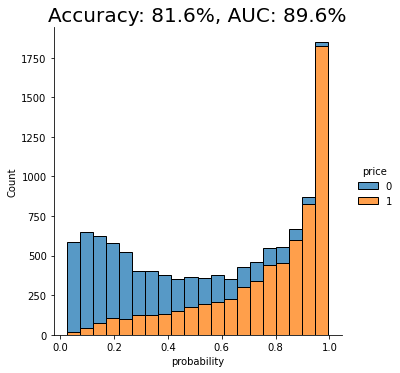

In [6]:
# prepare synthetic data, and split into features `X` and target `y`
X_syn, y_syn = prepare_xy(syn)
# train ML model on synthetic data with early stopping to prevent overfitting
model_syn = train_model(X_syn, y_syn)
# evaluate trained model on original holdout data
auc_syn = evaluate_model(model_syn, holdout)

### Train a Model on Real Data - Test on Real Data

Let's now compare these results achieved on synthetic data, with a model trained on real data. For a very good synthesizer, we expect to see a predictive performance of the two models being close to each other.

[LightGBM] [Info] Number of positive: 20649, number of negative: 15655
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.162702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1202
[LightGBM] [Info] Number of data points in the train set: 36304, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.568780 -> initscore=0.276877
[LightGBM] [Info] Start training from score 0.276877
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[75]	valid_0's auc: 0.901274


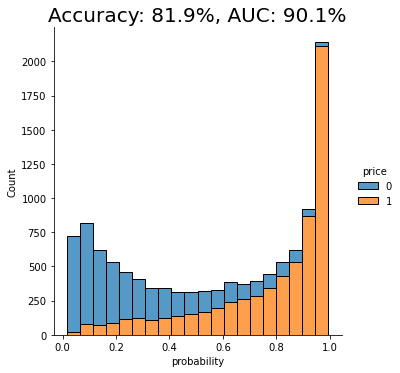

In [7]:
# prepare original training data, and split into features `X` and target `y`
X_trn, y_trn = prepare_xy(train)
# train ML model on original training data with early stopping to prevent overfitting
model_trn = train_model(X_trn, y_trn)
# evaluate trained model on original holdout data
auc_trn = evaluate_model(model_trn, holdout)

### Train a Model on Synthetic Data - Test on Real Data

We train the LightGBM on synthetic data, and then evaluate its performance on holdout data. We report two performance metrics:
1. **Accuracy**: This is the probability to correctly predict the `price` class of a randomly selected record.
2. **AUC** (Area-Under-Curve): This is the probability to correctly predict the `price` class, if two records, one with a rate >$100 and one with a rate below are given.

Whereas the Accuracy informs about the overall ability to get the class attribution correct, the AUC specifically informs about the ability to properly rank records, with respect to their probability of being within the target class or not. In both cases, the higher the metric, the better the predictive accuracy of the model.

The displayed chart shows the distribution of scores, that the model assigned to each of the holdout records. A score close to 0 means that model is very confident, that the record is available for less than 100 dollars per night. A score close to 1 means that the model is very confident that it's a more expensive Airbnb accomodation. These scores are further split by their actual outcome, i.e. whether the Airbnb accomodations do or do not cost more than 100 dollars per night. This allows to visually inspect the model's confidence in assigning the right scores.

## Extras: Data Preparation

The following code snippet has been used to prepare the provided dataset

In [8]:
import pandas as pd
# download data
df = pd.read_csv('http://data.insideairbnb.com/france/ile-de-france/paris/2023-03-13/data/listings.csv.gz')
# use subset of columns
df = df[['price', 'host_since', 'host_response_time', 'host_is_superhost',
       'neighbourhood_cleansed',
       'property_type', 'room_type', 'accommodates', 'bedrooms',
       'beds', 'minimum_nights', 'number_of_reviews',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location']]
# extract year of host_since
df['host_since'] = df['host_since'].str[:4]
# rename some columns for clarity
df.columns = [c.replace('review_scores', 'scores') for c in df]
df = df.rename(columns={'neighbourhood_cleansed': 'neighbourhood'})
# group long tail of property types into `other`
top_property_types = df.property_type.value_counts()[df.property_type.value_counts()>20].index
df.loc[~df.property_type.isin(top_property_types), 'property_type'] = 'other'
# convert price to numeric, and then to binary flag, depending on whether above or below $100
df.price = pd.to_numeric(df.price.str.replace(',', '').str[1:])
df.price = (df.price >= 100).replace({True: 'above $100', False: 'below $100'})
# split into training and holdout
df = df.sample(frac=1, random_state=123)
trn = df[:int(len(df)*0.8)]
hol = df[int(len(df)*0.8):]
trn.to_csv('paris-training.csv', index=False)
hol.to_csv('paris-holdout.csv', index=False)